<a href="https://colab.research.google.com/github/Mahendran180923/employee_attrition/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Analysis

In [ ]:
%%writefile app.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score, root_mean_squared_error
import streamlit as st
import pickle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from pyngrok import ngrok


# Load dataset
employee_data = pd.read_csv('/content/Employee_Attrition.csv')


# Data Cleaning and Preprocessing

df = pd.DataFrame(employee_data)
# print(df.info())
# print(df.describe())

duplicates = df.duplicated().sum()
# print(f"Number of duplicate rows: {duplicates}")
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)


# Exploratory data analysis

# Encode the object columns
encoder = {}
categorical_col = df.select_dtypes(include='object').columns
for col in categorical_col:
    encoder[col] = LabelEncoder()
    df[col] = encoder[col].fit_transform(df[col])


# Store the encoded file in pickle format
with open("encoder.pkl", 'wb') as f:
    pickle.dump(encoder, f)


# Outlier detecton
for col in df.columns:
    z_scores = np.abs(df[col] - df[col].mean() / df[col].std())
    outliers = df[z_scores > 4]
    # print(f"Outliers in column '{col}': {outliers.shape[0]}")
    # print(outliers)


# Find correlation
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap')
# plt.show()


# Machine Learning Model development

# Feature Selection
x = df.drop(['Attrition'], axis=1)
y = df['Attrition']


# Various Model Training
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.20, random_state=42)


# Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

# Gradient Boosting Classifier Model
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(x_train, y_train)

# Decision Tree Classifier Model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Model Evaluation Metrics
rfc_score = rfc.score(x_test, y_test)
gbc_score = gbc.score(x_test, y_test)
dtc_score = dtc.score(x_test, y_test)

print(f'Random Forest Accuracy Score: {rfc_score}')
print(f'Gradient Boosing Accuracy Score: {gbc_score}')
print(f'Decision Tree Accuracy Score: {dtc_score}')


# Save the model as pickle file
with open("model.pkl", 'wb') as f:
  pickle.dump(rfc, f)

# option = st.selectbox('Select employee number to fetch employee details or select details manually', ['Select Manually', 'Use Employee Number'])

# # if option == 'Select Manually':
if __name__ == "__main__":
  st.title("Employee Attrition Prediction")
  Age = st.number_input('Age', 18, 60)
  BusinessTravel = st.selectbox('BusinessTravel', employee_data['BusinessTravel'].unique())
  DailyRate = st.selectbox('DailyRate', sorted(employee_data['DailyRate'].unique()))
  Department = st.selectbox('Department', employee_data['Department'].unique())
  DistanceFromHome = st.selectbox('DistanceFromHome', sorted(employee_data['DistanceFromHome'].unique()))
  Education = st.selectbox('Education: Select "1" for below college or select "2" for above college ', employee_data['Education'].unique())
  EducationField = st.selectbox('EducationField', employee_data['EducationField'].unique())
  EnvironmentSatisfaction = st.selectbox('Satisfaction with the work environment: "1" = Low, "2" = Medium, "3" = High, "4" = Very High', sorted(employee_data['EnvironmentSatisfaction'].unique()))
  Gender = st.selectbox('Gender', employee_data['Gender'].unique())
  HourlyRate = st.selectbox('The employee hourly rate of pay', sorted(employee_data['HourlyRate'].unique()))
  JobInvolvement = st.selectbox('level of involvement the employee has in their job: "1" = Low, "2" = Medium, "3" = High, "4" = Very High', sorted(employee_data['JobInvolvement'].unique()) )
  JobLevel = st.selectbox('Job level of the Employee : e.g., "1" = Entry Level, "2" = Mid-Level, etc', sorted(employee_data['JobLevel'].unique()) )
  JobRole = st.selectbox('JobRole', employee_data['JobRole'].unique())
  JobSatisfaction = st.selectbox('Job Satisfaction with the job: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['JobSatisfaction'].unique()) )
  MaritalStatus = st.selectbox('MaritalStatus', employee_data['MaritalStatus'].unique())
  MonthlyIncome = st.selectbox('MonthlyIncome', sorted(employee_data['MonthlyIncome'].unique()))
  MonthlyRate = st.selectbox('MonthlyRate', sorted(employee_data['MonthlyRate'].unique()))
  NumCompaniesWorked = st.selectbox('NumCompaniesWorked', sorted(employee_data['NumCompaniesWorked'].unique()))
  OverTime = st.selectbox('OverTime', employee_data['OverTime'].unique())
  PercentSalaryHike = st.selectbox('PercentSalaryHike', sorted(employee_data['PercentSalaryHike'].unique()))
  PerformanceRating = st.selectbox('Peformance Rating: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['PerformanceRating'].unique()))
  RelationshipSatisfaction = st.selectbox('Relationship Satisfaction: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['RelationshipSatisfaction'].unique()))
  StockOptionLevel = st.number_input('Stock Option Level', min(employee_data['StockOptionLevel'].unique()), max(employee_data['StockOptionLevel'].unique()))
  TotalWorkingYears = st.selectbox('TotalWorkingYears', sorted(employee_data['TotalWorkingYears'].unique()))
  TrainingTimesLastYear = st.selectbox('TrainingTimesLastYear', sorted(employee_data['TrainingTimesLastYear'].unique()))
  WorkLifeBalance = st.selectbox('Work Life Balance: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['WorkLifeBalance'].unique()))
  YearsAtCompany = st.selectbox('YearsAtCompany', sorted(employee_data['YearsAtCompany'].unique()))
  YearsInCurrentRole = st.selectbox('YearsInCurrentRole', sorted(employee_data['YearsInCurrentRole'].unique()))
  YearsSinceLastPromotion = st.selectbox('YearsSinceLastPromotion', sorted(employee_data['YearsSinceLastPromotion'].unique()))
  YearsWithCurrManager = st.selectbox('YearsWithCurrManager', sorted(employee_data['YearsWithCurrManager'].unique()))


  user_data = pd.DataFrame(
      {'Age': [Age],
      'BusinessTravel': [BusinessTravel],
      'DailyRate': [DailyRate],
      'Department': [Department],
      'DistanceFromHome': [DistanceFromHome],
      'Education': [Education],
      'EducationField': [EducationField],
      'EnvironmentSatisfaction': [EnvironmentSatisfaction],
      'Gender': [Gender],
      'HourlyRate': [HourlyRate],
      'JobInvolvement': [JobInvolvement],
      'JobLevel': [JobLevel],
      'JobRole': [JobRole],
      'JobSatisfaction': [JobSatisfaction],
      'MaritalStatus': [MaritalStatus],
      'MonthlyIncome': [MonthlyIncome],
      'MonthlyRate': [MonthlyRate],
      'NumCompaniesWorked': [NumCompaniesWorked],
      'OverTime': [OverTime],
      'PercentSalaryHike': [PercentSalaryHike],
      'PerformanceRating': [PerformanceRating],
      'RelationshipSatisfaction': [RelationshipSatisfaction],
      'StockOptionLevel': [StockOptionLevel],
      'TotalWorkingYears': [TotalWorkingYears],
      'TrainingTimesLastYear': [TrainingTimesLastYear],
      'WorkLifeBalance': [WorkLifeBalance],
      'YearsAtCompany': [YearsAtCompany],
      'YearsInCurrentRole': [YearsInCurrentRole],
      'YearsSinceLastPromotion': [YearsSinceLastPromotion],
      'YearsWithCurrManager': [YearsWithCurrManager],})

  with open("/content/model.pkl", 'rb') as f:
      reloaded_rfc_attrition_prediction = pickle.load(f)

  with open("/content/encoder.pkl", 'rb') as f:
      reloaded_attrition_encoder = pickle.load(f)

  for col in user_data.columns:
      if col in reloaded_attrition_encoder:
          user_data[col] = reloaded_attrition_encoder[col].transform(user_data[col])

  if st.button('Predict Employee Attrition'):
      prediction = reloaded_rfc_attrition_prediction.predict(user_data)
      predicted_label = reloaded_attrition_encoder['Attrition'].inverse_transform(prediction)
      st.write(f"Employee Prediction: {predicted_label[0]}")

  # Create a public URL for the Streamlit app
    public_url = ngrok.connect(8501)
    print(public_url)



Writing app.py


In [ ]:
!pip install streamlit pyngrok ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
!streamlit run /content/app.py --server.runOnSave=true

/bin/bash: line 1: streamlit: command not found


## 10-07-2025 Data access

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Employee_Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [2]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Find Duplicate Rows

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Encoding

In [3]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Label Encoding for Binary Nominal
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})




In [4]:
# 2. Ordinal Encoding for BusinessTravel
df['BusinessTravel'] = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])\
                       .fit_transform(df[['BusinessTravel']])



In [5]:
# 3. One-Hot Encoding for Nominal Multi-Class
onehot_cols = ['EducationField', 'Gender', 'Department', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [6]:
df.drop(columns=['Over18'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   DistanceFromHome                   1470 non-null   int64  
 5   Education                          1470 non-null   int64  
 6   EmployeeCount                      1470 non-null   int64  
 7   EmployeeNumber                     1470 non-null   int64  
 8   EnvironmentSatisfaction            1470 non-null   int64  
 9   HourlyRate                         1470 non-null   int64  
 10  JobInvolvement                     1470 non-null   int64  
 11  JobLevel                           1470 non-null   int64

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1.0,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,49,0,2.0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1.0,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,2.0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,27,0,1.0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False
5,32,0,2.0,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,0,13,3,3,80,0,8,2,2,7,7,3,6,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True
6,59,0,1.0,1324,3,3,1,10,3,81,4,1,1,2670,9964,4,1,20,4,1,80,3,12,3,2,1,0,0,0,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
7,30,0,1.0,1358,24,1,1,11,4,67,3,1,3,2693,13335,1,0,22,4,2,80,1,1,2,3,1,0,0,0,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
8,38,0,2.0,216,23,3,1,12,4,44,2,3,3,9526,8787,0,0,21,4,2,80,0,10,2,3,9,7,1,8,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True
9,36,0,1.0,1299,27,3,1,13,3,94,3,2,3,5237,16577,6,0,13,3,2,80,2,17,3,2,7,7,7,7,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False


## Store Encoded file in pickle format

In [15]:
import pickle
df.to_pickle("encoded_employee_data.pkl")

In [16]:
df_loaded = pd.read_pickle("encoded_employee_data.pkl")

In [17]:
df_loaded.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1.0,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,49,0,2.0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1.0,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,2.0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,27,0,1.0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False


## Outlier Deduction

In [18]:
numerical_columns = df.select_dtypes(include='number').columns.to_list()

outlier_summary = {}

for col in numerical_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outlier_summary[col] = {
      'lower_bound': lower_bound,
      'upper_bound': upper_bound,
      'num_outliers': outliers.shape[0]
      }

outliers_df  = pd.DataFrame(outlier_summary).T.sort_values(by='num_outliers', ascending=False)
outliers_df.reset_index(inplace=True)
outliers_df.rename(columns={'index': 'column_name'}, inplace=True)
print(outliers_df)



                 column_name  lower_bound  upper_bound  num_outliers
0             BusinessTravel        1.000        1.000         427.0
1      TrainingTimesLastYear        0.500        4.500         238.0
2                  Attrition        0.000        0.000         237.0
3          PerformanceRating        3.000        3.000         226.0
4              MonthlyIncome    -5291.000    16581.000         114.0
5    YearsSinceLastPromotion       -4.500        7.500         107.0
6             YearsAtCompany       -6.000       18.000         104.0
7           StockOptionLevel       -1.500        2.500          85.0
8          TotalWorkingYears       -7.500       28.500          63.0
9         NumCompaniesWorked       -3.500        8.500          52.0
10        YearsInCurrentRole       -5.500       14.500          21.0
11      YearsWithCurrManager       -5.500       14.500          14.0
12                       Age       10.500       62.500           0.0
13           JobSatisfaction      

In [19]:
import numpy as np
for col in df.columns:
    z_scores = np.abs(df[col] - df[col].mean() / df[col].std())
    outliers = df[z_scores > 4]
    print(f"Outliers in column '{col}': {outliers.shape[0]}")
    print(outliers)

Outliers in column 'Age': 1470
      Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0      41          1             1.0       1102                 1          2   
1      49          0             2.0        279                 8          1   
2      37          1             1.0       1373                 2          2   
3      33          0             2.0       1392                 3          4   
4      27          0             1.0        591                 2          1   
...   ...        ...             ...        ...               ...        ...   
1465   36          0             2.0        884                23          2   
1466   39          0             1.0        613                 6          1   
1467   27          0             1.0        155                 4          3   
1468   49          0             2.0       1023                 2          3   
1469   34          0             1.0        628                 8          3   

      Em

/tmp/ipython-input-19-2408383541.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  z_scores = np.abs(df[col] - df[col].mean() / df[col].std())
/tmp/ipython-input-19-2408383541.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  z_scores = np.abs(df[col] - df[col].mean() / df[col].std())


In [20]:
!pip install scikit-learn

# Model Training

In [21]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Attrition', 'EmployeeCount', 'EmployeeNumber'], axis=1)
y = df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Model Creation

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train Classifers
log_reg_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
d_tree_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
rand_forest_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Prdictions

In [23]:
# Model Predictions
log_reg_prediction = log_reg_model.predict(x_test)
d_tree_prediction = d_tree_model.predict(x_test)
rand_forest_prediction = rand_forest_model.predict(x_test)

## Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Model Evaluation
results = {
    "Logistic Regression": { 'Accuracy': accuracy_score(y_test, log_reg_prediction),
                            'Report' : classification_report(y_test, log_reg_prediction, output_dict=True)},

    "Decision Tree": {'Accuracy': accuracy_score(y_test, d_tree_prediction),
                      'Report' : classification_report(y_test, d_tree_prediction, output_dict=True)},

    "Random Forest": {'Accuracy': accuracy_score(y_test, rand_forest_prediction),
                      'Report' : classification_report(y_test, rand_forest_prediction, output_dict=True)}
}

results

{'Logistic Regression': {'Accuracy': 0.8945578231292517,
  'Report': {'0': {'precision': 0.9028776978417267,
    'recall': 0.984313725490196,
    'f1-score': 0.9418386491557224,
    'support': 255.0},
   '1': {'precision': 0.75,
    'recall': 0.3076923076923077,
    'f1-score': 0.43636363636363634,
    'support': 39.0},
   'accuracy': 0.8945578231292517,
   'macro avg': {'precision': 0.8264388489208634,
    'recall': 0.6460030165912518,
    'f1-score': 0.6891011427596794,
    'support': 294.0},
   'weighted avg': {'precision': 0.8825980032300691,
    'recall': 0.8945578231292517,
    'f1-score': 0.8747858413363641,
    'support': 294.0}}},
 'Decision Tree': {'Accuracy': 0.7619047619047619,
  'Report': {'0': {'precision': 0.8744939271255061,
    'recall': 0.8470588235294118,
    'f1-score': 0.8605577689243028,
    'support': 255.0},
   '1': {'precision': 0.1702127659574468,
    'recall': 0.20512820512820512,
    'f1-score': 0.18604651162790697,
    'support': 39.0},
   'accuracy': 0.761

In [25]:
new_df = pd.DataFrame(results)
new_df

,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.894558,0.761905,0.87415
Report,"{'0': {'precision': 0.9028776978417267, 'recal...","{'0': {'precision': 0.8744939271255061, 'recal...","{'0': {'precision': 0.8784722222222222, 'recal..."


In [31]:
import pandas as pd
from sklearn.metrics import classification_report

# Classification reports
report_log = classification_report(y_test, log_reg_prediction, output_dict=True)
report_tree = classification_report(y_test, d_tree_prediction, output_dict=True)
report_rf = classification_report(y_test, rand_forest_prediction, output_dict=True)

# Extract scores from 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

comparison_table = pd.DataFrame({
    'Score Metric': [metric.capitalize() for metric in metrics],
    'Logistic Regression': [report_log['weighted avg'][metric] for metric in metrics],
    'Decision Tree': [report_tree['weighted avg'][metric] for metric in metrics],
    'Random Forest': [report_rf['weighted avg'][metric] for metric in metrics]
})

# Round for better display
comparison_table = comparison_table.round(3)

# Show the table
print(comparison_table)


  Score Metric  Logistic Regression  Decision Tree  Random Forest
0    Precision                0.883          0.781          0.850
1       Recall                0.895          0.762          0.874
2     F1-score                0.875          0.771          0.832


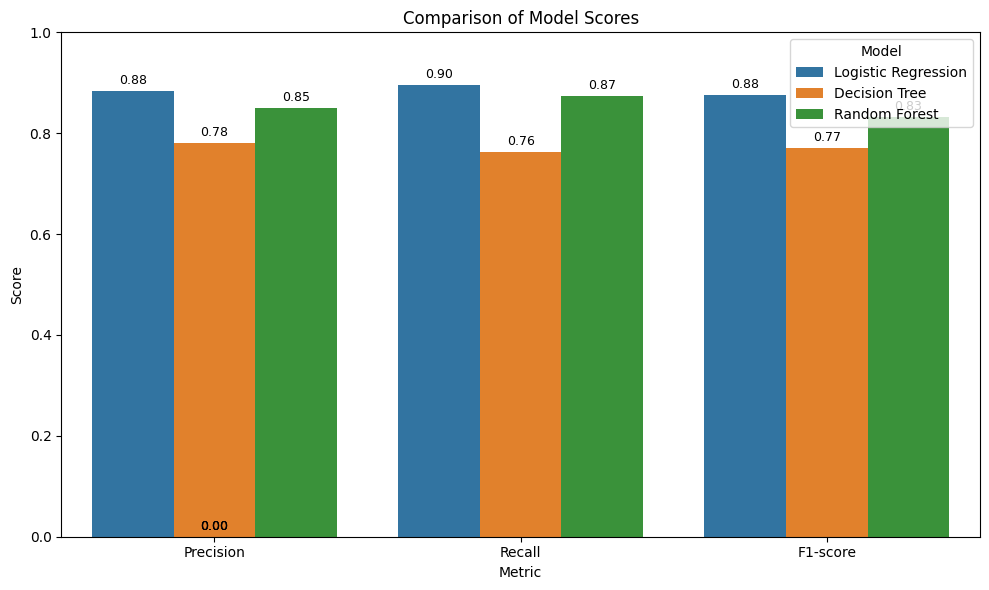

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the comparison table
metrics = ['precision', 'recall', 'f1-score']
comparison_table = pd.DataFrame({
    'Score Metric': [metric.capitalize() for metric in metrics],
    'Logistic Regression': [report_log['weighted avg'][m] for m in metrics],
    'Decision Tree': [report_tree['weighted avg'][m] for m in metrics],
    'Random Forest': [report_rf['weighted avg'][m] for m in metrics]
}).round(3)

# Melt the table to long format for Seaborn
df_plot = comparison_table.melt(id_vars='Score Metric',
                                 var_name='Model',
                                 value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Score Metric', y='Score', hue='Model')
plt.title('Comparison of Model Scores')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()